<a href="https://colab.research.google.com/github/vitroid/gromacs-usecases/blob/main/MDAnalysis%2BGromacs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Colabには標準でMDAnalysisはインストールされていないので各自でインストールする。

In [1]:
%pip install mdanalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.0/398.0 KB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 KB 3.6 MB/s eta 0:00:00


デモ用に、氷の構造をGenIceで生成する。

In [18]:
! pip install genice2
! genice2 CS1 -r 2 2 2 > cs1.gro

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 KB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for genice2: filename=GenIce2-2.1.7-py2.py3-none-any.whl size=813677 sha256=a4eb42f417a134f2ab8855256769b3727a9c987207ca3a64b967e13161c567a5
  Stored in directory: /root/.cache/pip/wheels/ec/b9/9e/f375e6c0eeb87e24dfda95d196d1f14ea0dcdc29673c803ef1
  Created wheel for tilecycles: filename=TileCycles-0.1.5.6-py3-none-any.whl size=6502 sha256=147f6055745cf8742513abb1187433da45262122517f471140118be89ebebc80
  Stored in directory: /root/.cache/pip/wheels/f6/99/73/2d999ad5f3b282adfa17991fbbb427975e6dd8090e823ac44d
Successfully built genice2 tilecycles
INFO __init__: Constructor of GenIce.
INFO   
INFO   Command line: /usr/local/bin/genice2 CS1 -r 2 2 2
INFO No rotmatrices in lattice
INFO Cell dimension:
INFO   a = 12.2

さて、さっそくgroを読みこませてみる。やっぱり`.top`は読んでくれないので、`.gro`だけ読む。

In [19]:
import MDAnalysis as mda

universe = mda.Universe("cs1.gro")
print(universe)

<Universe with 1104 atoms>


読めました。

yaplotに変換するコードを書いてみよう。

In [5]:
%pip install yaplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import MDAnalysis as mda
import yaplotlib as yap

def main():
    u = mda.Universe("cs1.gro") # 事前にopenしなくてもファイル名だけでいい。
    for residue in u.residues:
        if residue.resname[:3] == "SOL":
            C = None
            for atom in residue.atoms:
                if atom.name == "O":
                    O = u.atoms.positions[atom.index]
                elif atom.name == "H":
                    print(yap.Line(u.atoms.positions[atom.index], O), end="")

main()

l 10.3700 3.1900 -0.7100 10.6500 3.7000 0.0400 
l 10.1000 4.4800 0.0300 10.6500 3.7000 0.0400 
l 4.5300 0.0000 1.8300 3.6600 0.0000 1.4300 
l 3.8300 0.0000 0.4800 3.6600 0.0000 1.4300 
l 0.0000 2.4800 5.2400 0.0000 3.0700 6.0000 
l 0.0000 2.4800 6.7600 0.0000 3.0700 6.0000 
l 8.7000 4.0700 7.4700 8.1800 3.7400 8.2100 
l 7.9300 4.5300 8.7000 8.1800 3.7400 8.2100 
l 2.7000 1.4700 1.9300 2.1800 2.2100 2.2600 
l 1.9300 2.7000 1.4700 2.1800 2.2100 2.2600 
l 0.7500 8.4700 5.9900 -0.0500 9.0000 5.9600 
l -0.0100 9.5400 6.7500 -0.0500 9.0000 5.9600 
l 1.4700 10.0700 2.7000 2.2600 9.8200 2.2100 
l 1.9300 9.3100 1.4700 2.2600 9.8200 2.2100 
l 6.0000 10.5300 4.1700 6.0000 9.6600 4.5800 
l 6.0000 9.8300 5.5200 6.0000 9.6600 4.5800 
l 7.6400 6.7200 9.1900 7.3500 5.9600 9.7000 
l 7.9100 5.9700 10.4800 7.3500 5.9600 9.7000 
l 9.3300 1.4600 10.0800 9.8700 2.2100 9.8200 
l 9.3000 2.7400 9.2700 9.8700 2.2100 9.8200 
l 3.2900 3.2700 3.2600 3.8700 3.8200 3.7900 
l 3.3200 4.0800 4.5400 3.8700 3.8200 3.7900

Profilerで実行時間を測る。

In [22]:
import profile

profile.run('main()')

l 10.3700 3.1900 -0.7100 10.6500 3.7000 0.0400 
l 10.1000 4.4800 0.0300 10.6500 3.7000 0.0400 
l 4.5300 0.0000 1.8300 3.6600 0.0000 1.4300 
l 3.8300 0.0000 0.4800 3.6600 0.0000 1.4300 
l 0.0000 2.4800 5.2400 0.0000 3.0700 6.0000 
l 0.0000 2.4800 6.7600 0.0000 3.0700 6.0000 
l 8.7000 4.0700 7.4700 8.1800 3.7400 8.2100 
l 7.9300 4.5300 8.7000 8.1800 3.7400 8.2100 
l 2.7000 1.4700 1.9300 2.1800 2.2100 2.2600 
l 1.9300 2.7000 1.4700 2.1800 2.2100 2.2600 
l 0.7500 8.4700 5.9900 -0.0500 9.0000 5.9600 
l -0.0100 9.5400 6.7500 -0.0500 9.0000 5.9600 
l 1.4700 10.0700 2.7000 2.2600 9.8200 2.2100 
l 1.9300 9.3100 1.4700 2.2600 9.8200 2.2100 
l 6.0000 10.5300 4.1700 6.0000 9.6600 4.5800 
l 6.0000 9.8300 5.5200 6.0000 9.6600 4.5800 
l 7.6400 6.7200 9.1900 7.3500 5.9600 9.7000 
l 7.9100 5.9700 10.4800 7.3500 5.9600 9.7000 
l 9.3300 1.4600 10.0800 9.8700 2.2100 9.8200 
l 9.3000 2.7400 9.2700 9.8700 2.2100 9.8200 
l 3.2900 3.2700 3.2600 3.8700 3.8200 3.7900 
l 3.3200 4.0800 4.5400 3.8700 3.8200 3.7900

ざっくりと、水のケージ解析を書いてみよう。

In [13]:
%pip install cycless pairlist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pairlist: filename=PairList-0.2.12.4-cp39-cp39-linux_x86_64.whl size=37641 sha256=2b06ddfcfb6822e58abf4907016f414611de401a998173ff1682c055eb793e00
  Stored in directory: /root/.cache/pip/wheels/de/e3/7e/369fdaf91ae67548f80b448079ff8a3e1d62e0691c33891403
  Created wheel for methodtools: filename=methodtools-0.4.7-py3-none-any.whl size=3985 sha256=2c7a6b63334e6128f79c281db287755797cb101d338f17e383b0280b94046349
  Stored in directory: /root/.cache/pip/wheels/72/b9/66/569b9f6f6b5c6f606a461f7d7f48f876789268060478ad231e
  Created wheel for wirerope: filename=wirerope-0.4.7-py3-none-any.whl size=8993 sha256=a7240c182fc9498d389586d808795c2e3a99564ab5b5dbde45fc3977

In [23]:
import MDAnalysis as mda
from cycless.cycles import cycles_iter
from cycless.polyhed import polyhedra_iter
import pairlist
import numpy as np
import networkx as nx

def water_HB_digraph(waters, cellmat):
    dg = nx.DiGraph()
    celli   = np.linalg.inv(cellmat)
    H = np.array([u.atoms.positions[atom.index] for water in waters for atom in water.atoms if atom.name == "H"], dtype=float)
    O = np.array([u.atoms.positions[atom.index] for water in waters for atom in water.atoms if atom.name == "O"], dtype=float)
    # In a fractional coordinate
    rH = H @ celli
    rO = O @ celli
    # O-H distance is closer than 2.45 AA
    # Matsumoto JCP 2007 https://doi.org/10.1063/1.2431168
    for i,j,d in pairlist.pairs_iter(rH, 2.45, cellmat, pos2=rO):
        # but distance is greater than 1 AA (i.e. O and H are not in the same molecule)
        if 1 < d:
            # label of the molecule where Hydrogen i belongs.
            imol = i // 2
            # H to O vector
            # vec attribute is useful when you use cycless.dicycles.
            dg.add_edge(imol, j, vec=rO[j] - rH[i])
    return dg, rO


# Unfortunately, MDAnalysis does not read the concatenated gro file.
# https://docs.mdanalysis.org/stable/documentation_pages/coordinates/GRO.html
traj = open("cs1.gro")

u = mda.Universe(traj)
# cell dimension a,b,c,A,B,G
# Note: length unit of MDAnalysis is AA, not nm.
dimen   = u.trajectory.ts.dimensions
# cell matrix (might be transposed)
cellmat = mda.lib.mdamath.triclinic_vectors(dimen)
# Pick up water molecules only
waters = [residue for residue in u.residues if residue.resname[:3] == "SOL"]

# make a graph of hydrogen bonds and fractional coordinate of its vertices
dg, rO = water_HB_digraph(waters, cellmat)
# undirected graph
g = nx.Graph(dg)
# detect the pentagons and hexagons.
cycles = [cycle for cycle in cycles_iter(g, maxsize=6, pos=rO) if len(cycle) > 4]
# detect the cages with number of faces between 12 and 16.
cages  = [cage for cage in polyhedra_iter(cycles, maxnfaces=16) if len(cage) > 11]
for cage in cages:
    print(len(cage), cage)

14 {0, 1, 3, 8, 41, 10, 40, 396, 45, 77, 72, 57, 60, 63}
14 {0, 2, 131, 4, 132, 6, 133, 9, 44, 13, 140, 15, 145, 151}
14 {384, 1, 2, 387, 385, 5, 386, 388, 389, 426, 11, 141, 14, 142}
12 {32, 33, 34, 3, 4, 5, 37, 7, 138, 42, 139, 428}
14 {6, 7, 8, 39, 38, 201, 167, 166, 211, 148, 149, 58, 251, 158}
14 {64, 67, 9, 10, 11, 12, 397, 46, 47, 16, 80, 49, 398, 52}
12 {12, 13, 14, 143, 48, 17, 144, 429, 21, 22, 23, 26}
14 {161, 163, 197, 203, 155, 15, 16, 17, 207, 51, 152, 153, 27, 28}
14 {68, 69, 47, 400, 399, 18, 19, 50, 21, 53, 55, 86, 28, 30}
14 {33, 35, 39, 137, 18, 146, 20, 147, 22, 54, 24, 157, 27, 29}
14 {34, 36, 390, 391, 392, 393, 394, 395, 427, 19, 20, 23, 25, 31}
14 {26, 99, 100, 422, 423, 136, 421, 101, 117, 118, 24, 25, 122, 120}
14 {32, 38, 70, 40, 74, 43, 401, 62, 56, 89, 59, 29, 30, 31}
14 {35, 36, 37, 102, 103, 424, 425, 104, 107, 108, 111, 120, 123, 127}
14 {352, 384, 355, 41, 42, 43, 394, 361, 303, 304, 305, 311, 312, 348}
12 {160, 161, 65, 162, 200, 169, 44, 45, 46, 204, 

こういう解析をするなら特段便利でもない。でも、MDAnalysisで使えるようにコードを作っておくと、他人と共有する時に手間が減ると思われる。

ここでは1フレームのみのgroファイルを読んだが、複数のフレームが含まれている時はこの書き方では最初のフレームしか読まない。MDAnalysisは、複数のフレームが含まれるgroファイルを読む機能がない。https://docs.mdanalysis.org/stable/documentation_pages/coordinates/GRO.html 

複数のフレームを連続的に読みこむためのハックはこちら。

In [ ]:
import MDAnalysis as mda
import io


def gro_iter(file):
    """.groファイルに含まれる複数の座標セットを、別々のファイルとして提供する。

    Args:
        file (file handle): file handle of a .gro file containing multiple frames.
    """
    s = []
    Natom = -99
    for line in file:
        s.append(line)
        if len(s) == 2:
            Natom = int(line)
        elif len(s) == Natom+3:
            yield io.StringIO("".join(s))
            s = []
            Natom = -99


with open("trajectory.gro") as f:
    for file in gro_iter(f):
        u = mda.Universe(file, format="GRO")
        # ...

もうちょっと直接的にMDAnalysisを使う方法は? 例えば動径分布関数(RDF)ぐらいはすぐ出せるだろうか。


/usr/local/lib/python3.9/dist-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/usr/local/lib/python3.9/dist-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


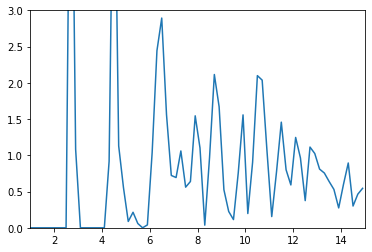

In [24]:
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as RDF
from matplotlib import pyplot as plt

u = mda.Universe("cs1.gro")

# Select carbons
# https://docs.mdanalysis.org/stable/documentation_pages/selections.html
O = u.select_atoms("resname SOL and name O")

# Make RDF class
# https://docs.mdanalysis.org/stable/documentation_pages/analysis/rdf.html
rdf = RDF.InterRDF(O, O)
rdf.run()

fig = plt.figure()
plt.ylim(0,3)
plt.xlim(1, 15)
plt.plot(rdf.bins, rdf.rdf)
fig.savefig("OO.pdf")

py3DMolを使い、Colab上で作画してみる。

In [27]:
%pip install py3Dmol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import MDAnalysis as mda
import pairlist
import numpy as np
import networkx as nx

def water_HB_digraph(waters, cellmat):
    dg = nx.DiGraph()
    celli   = np.linalg.inv(cellmat)
    H = np.array([u.atoms.positions[atom.index] for water in waters for atom in water.atoms if atom.name == "H"], dtype=float)
    O = np.array([u.atoms.positions[atom.index] for water in waters for atom in water.atoms if atom.name == "O"], dtype=float)
    # In a fractional coordinate
    rH = H @ celli
    rO = O @ celli
    # O-H distance is closer than 2.45 AA
    # Matsumoto JCP 2007 https://doi.org/10.1063/1.2431168
    for i,j,d in pairlist.pairs_iter(rH, 2.45, cellmat, pos2=rO):
        # but distance is greater than 1 AA (i.e. O and H are not in the same molecule)
        if 1 < d:
            # label of the molecule where Hydrogen i belongs.
            imol = i // 2
            # H to O vector
            # vec attribute is useful when you use cycless.dicycles.
            dg.add_edge(imol, j, vec=rO[j] - rH[i])
    return dg, rO


# Unfortunately, MDAnalysis does not read the concatenated gro file.
# https://docs.mdanalysis.org/stable/documentation_pages/coordinates/GRO.html
traj = open("cs1.gro")

u = mda.Universe(traj)
# cell dimension a,b,c,A,B,G
# Note: length unit of MDAnalysis is AA, not nm.
dimen   = u.trajectory.ts.dimensions
# cell matrix (might be transposed)
cellmat = mda.lib.mdamath.triclinic_vectors(dimen)
# Pick up water molecules only
waters = [residue for residue in u.residues if residue.resname[:3] == "SOL"]

# make a graph of hydrogen bonds and fractional coordinate of its vertices
dg, rO = water_HB_digraph(waters, cellmat)

# centering
rO -= 0.5 

In [29]:

import py3Dmol

def a2v3(a, labels="xyz"):
    return dict(zip(labels,a))

def Line(view,a,b,width=1.0):
    # https://3dmol.csb.pitt.edu/doc/$3Dmol.GLShape.html#addLine
    view.addLine({"start": a2v3(a),
                         "end":   a2v3(b),
                    # "color":"cyan",
                    })

def drawEdges(view, dg, rO, cellmat):
    for i,j in dg.edges():
        d = rO[j] - rO[i]
        d -= np.floor(d+0.5)
        a = rO[i] @ cellmat
        b = (rO[i]+d) @ cellmat
        Line(view, a, b)

view = py3Dmol.view()
drawEdges(view, dg, rO, cellmat)
view    
     

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol